<a href="https://colab.research.google.com/github/AdrianCPC/Bases_clasificacion_ML/blob/main/Tecnicas_de_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning: Clasificación entre Bastidores**

En este notebook estaremos desarrollando varias técnicas de clasificación para un conjunto de datos de una empresa de telecomunicaciones.

En caso de que desees consultar el dataset original, este se encuentra en el siguiente enlace:
https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets?select=churn-bigml-20.csv

## Aula 1

### 1.2 Importando los datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd


datos = pd.read_csv('/content/drive/MyDrive/customer_churn.csv')
datos.head()


,Mayor65Anos,Conyuge,Dependientes,MesesDeContrato,TelefonoFijo,VariasLineasTelefonicas,ServicioDeInternet,SeguridadOnline,BackupOnline,SeguroEnDispositivo,SoporteTecnico,TVaCable,StreamingDePeliculas,TipoDeContrato,PagoOnline,FormaDePago,CuentaMensual,Churn
0,0,Si,No,1,No,SinServicioTelefonico,DSL,No,Si,No,No,No,No,Mensual,Si,ChequeDigital,29.85,No
1,0,No,No,34,Si,No,DSL,Si,No,Si,No,No,No,Anual,No,ChequePapel,56.95,No
2,0,No,No,2,Si,No,DSL,Si,Si,No,No,No,No,Mensual,Si,ChequePapel,53.85,Si
3,0,No,No,45,No,SinServicioTelefonico,DSL,Si,No,Si,Si,No,No,Anual,No,DebitoAutomatico,42.30,No
4,0,No,No,2,Si,No,FibraOptica,No,No,No,No,No,No,Mensual,Si,ChequeDigital,70.70,Si


In [4]:
datos.shape

(7043, 18)

### 1.3 Tipos de variables

In [5]:
datos.head()

,Mayor65Anos,Conyuge,Dependientes,MesesDeContrato,TelefonoFijo,VariasLineasTelefonicas,ServicioDeInternet,SeguridadOnline,BackupOnline,SeguroEnDispositivo,SoporteTecnico,TVaCable,StreamingDePeliculas,TipoDeContrato,PagoOnline,FormaDePago,CuentaMensual,Churn
0,0,Si,No,1,No,SinServicioTelefonico,DSL,No,Si,No,No,No,No,Mensual,Si,ChequeDigital,29.85,No
1,0,No,No,34,Si,No,DSL,Si,No,Si,No,No,No,Anual,No,ChequePapel,56.95,No
2,0,No,No,2,Si,No,DSL,Si,Si,No,No,No,No,Mensual,Si,ChequePapel,53.85,Si
3,0,No,No,45,No,SinServicioTelefonico,DSL,Si,No,Si,Si,No,No,Anual,No,DebitoAutomatico,42.30,No
4,0,No,No,2,Si,No,FibraOptica,No,No,No,No,No,No,Mensual,Si,ChequeDigital,70.70,Si


In [6]:
traduccion = {
    'Si':1,
    'No':0
}

datos_modificados = datos[['Conyuge', 'Dependientes','TelefonoFijo','PagoOnline','Churn']].replace(traduccion)


datos_modificados.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [7]:
datos_dummy = pd.get_dummies(datos.drop(columns=['Conyuge', 'Dependientes','TelefonoFijo','PagoOnline','Churn'],axis=1))

In [8]:
datos_final = pd.concat([datos_modificados,datos_dummy],axis=1)
datos_final.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor65Anos,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,...,StreamingDePeliculas_No,StreamingDePeliculas_Si,StreamingDePeliculas_SinServicioDeInternet,TipoDeContrato_Anual,TipoDeContrato_Bienal,TipoDeContrato_Mensual,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoAutomatico,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,0,0,...,1,0,0,0,0,1,1,0,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,45,42.30,0,0,...,1,0,0,1,0,0,0,0,1,0
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,0,1,1,0,0,0


### 1.5 Definición Formal

Información para la clasificación:

$X$ = inputs (datos de entrada)

$y$ = outputs (datos de saída)

In [9]:
pd.set_option('display.max_columns',39)

In [10]:
datos_final.head()

,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Churn,Mayor65Anos,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,ServicioDeInternet_DSL,ServicioDeInternet_FibraOptica,ServicioDeInternet_No,SeguridadOnline_No,SeguridadOnline_Si,SeguridadOnline_SinServicioDeInternet,BackupOnline_No,BackupOnline_Si,BackupOnline_SinServicioDeInternet,SeguroEnDispositivo_No,SeguroEnDispositivo_Si,SeguroEnDispositivo_SinServicioDeInternet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServicioDeInternet,TVaCable_No,TVaCable_Si,TVaCable_SinServicioDeInternet,StreamingDePeliculas_No,StreamingDePeliculas_Si,StreamingDePeliculas_SinServicioDeInternet,TipoDeContrato_Anual,TipoDeContrato_Bienal,TipoDeContrato_Mensual,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoAutomatico,FormaDePago_TarjetaDeCredito
0,1,0,0,1,0,0,1,29.85,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,45,42.30,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0



$y_i$ = $f(x_i)$

In [11]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [12]:
#ymaria=?

Nuevos pares de información = ($Xmaria$, $ymaria$)

### 1.6 Balanceo de los datos

In [13]:
import seaborn as sns

<Axes: xlabel='Churn', ylabel='count'>

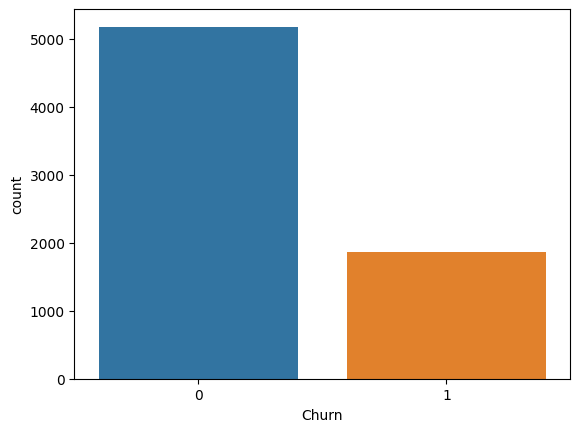

In [14]:
sns.countplot(x='Churn',data=datos_final)

In [15]:
datos_final.Churn.value_counts() #se recomienda crear datos artificiales de 1

0    5174
1    1869
Name: Churn, dtype: int64

In [16]:
from imblearn.over_sampling import SMOTE

X = datos_final.drop(columns='Churn', axis=1)
y = datos_final['Churn']


smt = SMOTE(random_state=123)

#muestreo oversampling
X, y = smt.fit_resample(X,y)

In [17]:
datos_final.shape

(7043, 39)

In [18]:
datos_final = pd.concat([X,y],axis=1)
datos_final.shape   #esto se hace para que quede balanceado

(10348, 39)

In [19]:
#tomando muestras
datos_final.sample(5)


,Conyuge,Dependientes,TelefonoFijo,PagoOnline,Mayor65Anos,MesesDeContrato,CuentaMensual,VariasLineasTelefonicas_No,VariasLineasTelefonicas_Si,VariasLineasTelefonicas_SinServicioTelefonico,ServicioDeInternet_DSL,ServicioDeInternet_FibraOptica,ServicioDeInternet_No,SeguridadOnline_No,SeguridadOnline_Si,SeguridadOnline_SinServicioDeInternet,BackupOnline_No,BackupOnline_Si,BackupOnline_SinServicioDeInternet,SeguroEnDispositivo_No,SeguroEnDispositivo_Si,SeguroEnDispositivo_SinServicioDeInternet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_SinServicioDeInternet,TVaCable_No,TVaCable_Si,TVaCable_SinServicioDeInternet,StreamingDePeliculas_No,StreamingDePeliculas_Si,StreamingDePeliculas_SinServicioDeInternet,TipoDeContrato_Anual,TipoDeContrato_Bienal,TipoDeContrato_Mensual,FormaDePago_ChequeDigital,FormaDePago_ChequePapel,FormaDePago_DebitoAutomatico,FormaDePago_TarjetaDeCredito,Churn
1592,1,1,1,1,0,42,77.95,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1
5955,1,1,1,0,0,72,68.40,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0
6079,1,0,1,0,0,25,54.10,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0
4842,0,0,1,0,1,9,54.55,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1
3101,0,0,1,1,0,58,79.80,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


In [20]:
datos_final.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

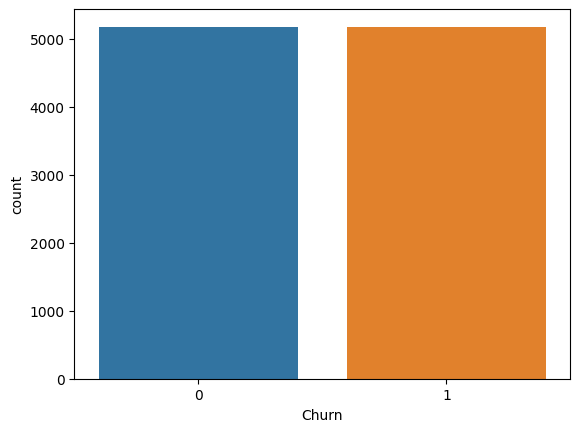

In [21]:
sns.countplot(x='Churn',data=datos_final) #para observar los datos ya balanceados, para que el clasificador detecte mejor la frontera de clasificacion

Entre los algoritmos de clasificación más conocidos, podemos citar los siguientes:

K-Nearest Neighbors (KNN);

Support Vector Machine (SVM);
Decision Tree Classifier;

Random Forest Classifier.


Entre los algoritmos de regresion se pueden citar los siguiente:

Linear Regression;

Random Forest Regressor;

Support Vector Regression (SVR).

En esta aula aprendimos a:

Identificar los tipos de variables: Numéricas y Categóricas;

Comprender el concepto de clasificación y cuando debemos utilizarlo;

Explicar los cálculos matemáticos por detrás de la clasificación;


Diferenciar la clasificación de la regresión;

Demostrar el balanceo de los datos.

## Aula 2

### 2.2 KNN entre bastidores

In [22]:
Xmaria

[[0,
  0,
  1,
  1,
  0,
  0,
  39.9,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1]]

In [23]:
#ymaria = ?

In [24]:
X = datos_final.drop(columns='Churn', axis=1)
y = datos_final['Churn']

In [25]:
#Estandarizar datos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

In [26]:
X_std[0]

array([ 1.26542767, -0.52771004, -3.06083934,  0.81482091, -0.41318358,
       -1.10771815, -1.3217706 , -0.88447396, -0.83366906,  3.18604176,
        1.51268338, -1.04386816, -0.44617598,  0.86827317, -0.51721942,
       -0.44617598, -0.95834643,  1.57389661, -0.44617598,  1.04285807,
       -0.64211419, -0.44617598,  0.87979784, -0.52426638, -0.44617598,
        1.18690873, -0.77707385, -0.44617598,  1.20311799, -0.78976268,
       -0.44617598, -0.41989297, -0.44648735,  0.73788726,  1.30373042,
       -0.47912706, -0.4360152 , -0.42576817])

In [27]:
Xmaria_std = scaler.transform(pd.DataFrame(Xmaria, columns=X.columns))

Distancia Euclidiana:

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

In [28]:
import numpy as np

a = Xmaria_std
b = X_std[0]

exponenciacion = np.square(a-b)
suma = np.sum(exponenciacion)

distancia = np.sqrt(suma)
print(f'La distancia euclidiana de Maria con respecto al primer registro del dataset es : {distancia}')

La distancia euclidiana de Maria con respecto al primer registro del dataset es : 9.546414124830829


### 2.3 Implementando el modelo KNN

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [31]:
prevision_knn = knn.predict(X_test)

In [32]:
prevision_knn

array([1, 0, 1, ..., 1, 1, 1])

Calculando distancias de Maria contra los 10 primeros clientes

In [33]:
def calcula_distancia(datos_clientes, datos_maria, numero_clientes):
    distancias = []
    #loop para recorrer cliente por cliente
    for i in range(numero_clientes):
        dist1 = datos_maria - datos_clientes[i]            #sustracción de los atributos
        suma_cuadrado = np.sum(np.square(dist1))    #exp. y suma de todos los atributos
        distancias.append(np.sqrt(suma_cuadrado))   #raiz cuadrada de la suma anterior
    return distancias

In [34]:
calcula_distancia(X_std, Xmaria_std, 10)

[9.546414124830829,
 9.404030078619193,
 8.463138138845297,
 10.405324915150391,
 7.109597577196519,
 8.345667269659458,
 8.030514660188228,
 10.1371893774061,
 8.119278746494642,
 10.07511545026907]

En esta aula aprendimos a:

Utilizar la división del conjunto de datos en entrenamiento y prueba;

Implementar el modelo K-nearest neighbors (KNN);

Explicar cómo funciona el modelo KNN entre bastidores;

Identificar las funciones de distancia

## Aula 3

### 3.3 Implementando el modelo Bernoulli Naive Bayes

In [35]:
mediana = np.median(X_train)

In [36]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=mediana)

In [37]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [38]:
prevision_bnb = bnb.predict(X_test)

In [39]:
prevision_bnb

array([1, 0, 0, ..., 1, 1, 1])

En esta aula aprendimos a:

Utilizar el Clasificador de Naïve Bayes;

Explicar los cálculos matemáticos por detrás del modelo;

Implementar el algoritmo BernoulliNB();

Explicar la probabilidad condicional y el teorema de Bayes.

## Aula 4

### 4.3 Implementando el modelo de Árbol de Decisión

In [40]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=7)


In [41]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)

In [42]:
dtc.feature_importances_

array([0.00650752, 0.00718729, 0.00946627, 0.00325253, 0.        ,
       0.12121953, 0.06273966, 0.00982336, 0.00520748, 0.00574605,
       0.00404197, 0.06381975, 0.        , 0.0034002 , 0.0181855 ,
       0.        , 0.        , 0.00577616, 0.        , 0.        ,
       0.        , 0.00751337, 0.01870472, 0.02871003, 0.        ,
       0.        , 0.        , 0.        , 0.00571023, 0.01816449,
       0.        , 0.151868  , 0.07388663, 0.33369176, 0.00098848,
       0.00747076, 0.01120199, 0.0157163 ])

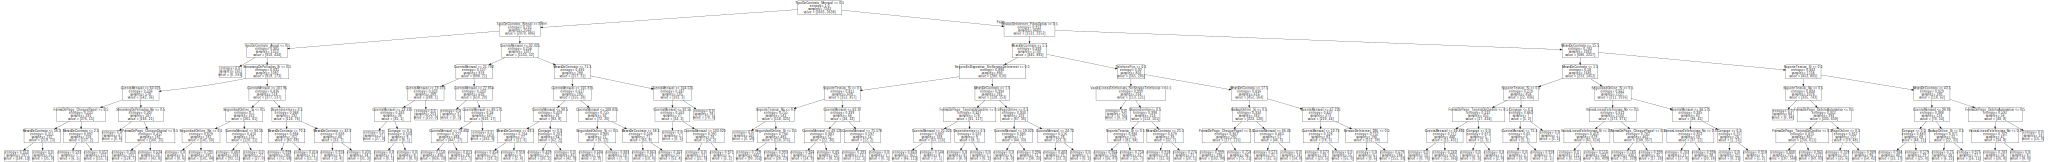

In [43]:
# graficar arbol de decision
from sklearn.tree import export_graphviz
import graphviz


features = X.columns
dot_data = export_graphviz(dtc,feature_names=features)
grafico = graphviz.Source(dot_data)

grafico

In [44]:
prevision_dtc = dtc.predict(X_test)

In [45]:
prevision_dtc

array([0, 0, 0, ..., 1, 1, 1])

En esta aula aprendimos a:

Explicar el modelo de Árbol de Decisión;

Interpretar los cálculos matemáticos detrás del modelo de Árbol de Decisión;

Implementar el algoritmo DecisionTreeClassifier().

## Aula 5

### 5.1 Matriz de Confusión

![img](https://miro.medium.com/max/799/1*XsFcyoLXNdAkbSfNGnxhEg.png)

In [46]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prevision_knn))

[[1125  444]
 [ 152 1384]]


In [47]:
print(confusion_matrix(y_test, prevision_bnb)) #matriz para bernoulli

[[1075  494]
 [ 233 1303]]


In [48]:
print(confusion_matrix(y_test, prevision_dtc)) #matriz para arbol de decision

[[1262  307]
 [ 293 1243]]


### 5.2 Exactitud

> A partir del cálculo de la matriz de confusión logramos inferir otras métricas, como por ejemplo la exactitud.

$exactitud$ = ${TP + TN \over TP + FP + TN + FN}$

In [49]:
from sklearn.metrics import accuracy_score


print(accuracy_score(y_test, prevision_knn))

0.8080515297906602


In [50]:
print(accuracy_score(y_test, prevision_bnb))

0.7658615136876007


In [51]:
print(accuracy_score(y_test, prevision_dtc))

0.8067632850241546


### 5.3 Precisión

> Otra métrica importante es la precisión, que calcula cuántas observaciones fueron clasificadas correctamente como positivas ($TP$).

$precision$ = ${TP \over TP + FP}$

In [52]:
from sklearn.metrics import precision_score


print(precision_score(y_test, prevision_knn))

0.7571115973741794


In [53]:
print(precision_score(y_test, prevision_bnb))

0.7250973845297718


In [54]:
print(precision_score(y_test, prevision_dtc))
#el mejor modelo es el arbol de decision debido a la matriz de confusion y la disminucion del error tipo 2

0.8019354838709677


### 5.4 Recall

> Además, existe una métrica conocida como Recall o sensibilidad, que calcula qué tan bien el modelo clasifica correctamente un resultado positivo ($TP$).

$recall$ = ${TP \over TP + FN}$


In [55]:
from sklearn.metrics import recall_score


print(recall_score(y_test,prevision_knn))

0.9010416666666666


In [56]:
print(recall_score(y_test,prevision_bnb))

0.8483072916666666


In [57]:
print(recall_score(y_test,prevision_dtc))

0.8092447916666666


En esta aula aprendimos a:

Explicar cómo funciona la matriz de confusión;

Diferenciar las principales métricas (exactitud, precisión y sensibilidad) para evaluar un modelo de clasificación;

Comparar otras métricas que pueden ser usadas dependiendo del problema que involucre a los datos;

Calcular cada una de estas métricas para el dataset;
Seleccionar el mejor modelo para los datos.